In [1]:
# import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\eprmitr\Desktop\TIGER\Mortgage Insurance Cross Sell.xls")
df.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


# Data Engineering

In [3]:
df.shape

(16383, 59)

In [4]:
#Converting columns into lower case
df.columns = [i.lower() for i in df.columns]

In [5]:
#Duplicate check
dup=df[df.duplicated()]
print(dup)

Empty DataFrame
Columns: [ref, credit_score, final_grade, term, net_advance, apr, loan_type, mosaic, mosaic_class, time_at_address, residential_status, telephone_indicator, number_of_dependants, marital_status, gender, time_in_employment, employment_status, full_part_time_empl_ind, perm_temp_empl_ind, income_range, current_account, access_card, visa_card, american_express, diners_card, cheque_guarantee, other_credit_store_card, time_with_bank, value_of_property, outstanding_mortgage_bal, total_outstanding_balances, bureau_data___monthly_other_co_r, worst_history_ct, payment_method, age, total_outstanding_balance__mortg, total___public_info___ccj____ban, total_value__public_info___ccj__, time_since_most_recent_public_in, total_value__cais_8_9s, worst_status_l6m, worst_current_status, __of_status_3_s_l6m, searches___total___l6m, years_on_er_for_sp, bankruptcy_detected__sp_, total___outstanding_ccj_s, total_outstanding_balance___excl, total___of_accounts, cifas_detected, time_since_most_r

##### Theres no duplicate in the dataset

# Descriptive Statistics

In [6]:
df.describe()

,ref,credit_score,term,net_advance,apr,mosaic,mosaic_class,time_at_address,number_of_dependants,time_in_employment,...,years_on_er_for_sp,total___outstanding_ccj_s,total_outstanding_balance___excl,total___of_accounts,time_since_most_recent_outstandi,ppi,code,ppi_single,ppi_joint,ppi_lci
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,9405.000000,16383.000000,16383.000000,16383.000000
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.808460,103.096075,...,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
std,12142.797527,93.149605,26.689123,6673.343595,9.662504,16.718957,5.130278,109.192185,1.118947,91.541972,...,7.449055,0.540908,145.935978,2.669217,22.092297,0.493974,24.283753,0.485976,0.263032,0.325402
min,1.000000,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,517.000000,0.000000,0.000000,0.000000
25%,10699.000000,818.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,38.000000,0.000000,38.000000,...,1.000000,0.000000,34.000000,4.000000,99.000000,0.000000,716.000000,0.000000,0.000000,0.000000
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.000000,72.000000,...,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000
75%,31689.000000,947.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,180.000000,1.000000,144.000000,...,10.000000,0.000000,194.000000,9.000000,99.000000,1.000000,759.000000,1.000000,0.000000,0.000000
max,42072.000000,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,...,34.000000,9.000000,999.000000,9.000000,99.000000,1.000000,779.000000,1.000000,1.000000,1.000000


# Data visualizations

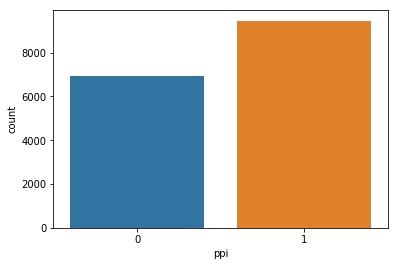

In [7]:
sns.countplot(df['ppi'])

#### The target is okay, looks balanced

All the Exploratory Data Analysis is done in Tableau (only few are here)

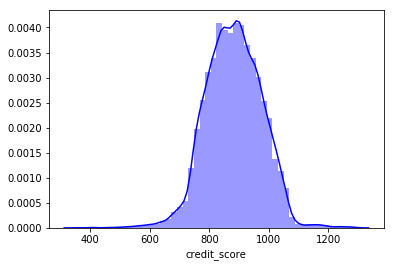

In [8]:
#plt.figure(figsize=(10,8))
sns.distplot(df[['credit_score']['ppi'=='1']], color="blue")
#sns.distplot(df[['credit_score']['ppi'=='0']] , color="red")

plt.show()

ppi                0     1    All
cifas_detected                   
N               6890  9402  16292
T                  4     4      8
Y                 28    55     83
All             6922  9461  16383


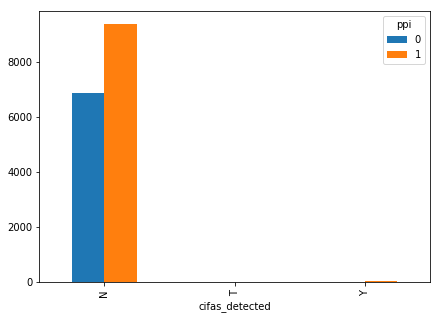

In [9]:
# Fraud detection
print(pd.crosstab(df.cifas_detected,df.ppi,margins=True))
pd.crosstab(index=df['cifas_detected'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

(i) Cifas & (ii) bankruptcy_detected__sp_ are pretty similar (only CIFAS selected)

Cifas detected ='Y' are potential fraudulant cases, should not be targeted; Only "N" cases to be targeted

ppi                  0     1    All
worst_status_l6m                   
0                 4241  5243   9484
1                 1625  2315   3940
2                  552   905   1457
3                  249   464    713
4                   74   164    238
5                   52   115    167
6                  129   255    384
All               6922  9461  16383


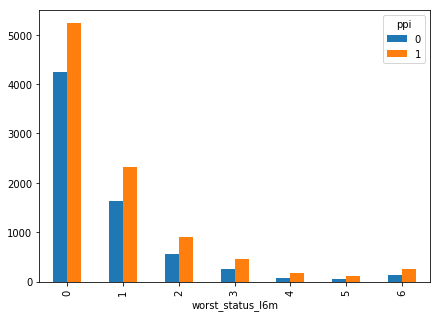

In [10]:
# Risk (loan/CC payment misses in last 6 months)
print(pd.crosstab(df.worst_status_l6m,df.ppi,margins=True))
pd.crosstab(index=df['worst_status_l6m'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

As per last 6months data (0 misses loan/CC payment cases) are best for Cross sell offerings

ppi        0     1    All
gender                   
F       2711  3902   6613
M       4211  5559   9770
All     6922  9461  16383


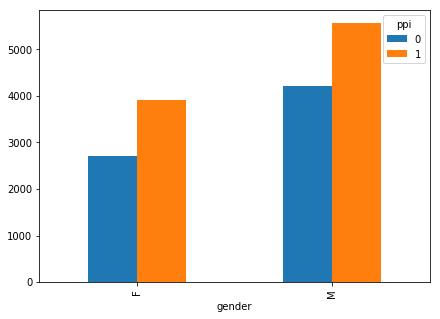

In [11]:
# Gender Vs PPI
print(pd.crosstab(df.gender,df.ppi,margins=True))
pd.crosstab(index=df['gender'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

Gender looks equally distributed, not a major feature

ppi              0     1    All
mosaic_class                   
1              936   542   1478
2             1107  1106   2213
3              830   908   1738
4             1242  1892   3134
5              214   339    553
6              260   606    866
7              557  1225   1782
8             1034  1889   2923
9              130   224    354
10             320   400    720
11             279   309    588
99              13    21     34
All           6922  9461  16383


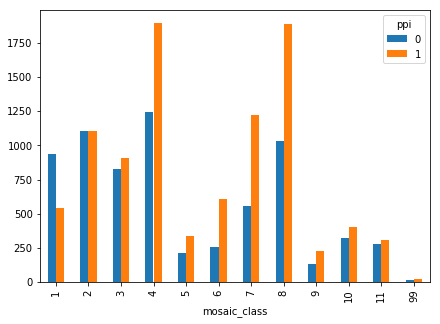

In [12]:
# Loan Vs PPI
print(pd.crosstab(df.mosaic_class,df.ppi,margins=True))
pd.crosstab(index=df['mosaic_class'], columns=df['ppi']).plot(kind='bar',figsize=(7,5))

# Data Prep

In [13]:
#changing categorical value to numerical values
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['loan_type'] = le.fit_transform(df['loan_type'])
df['residential_status'] = le.fit_transform(df['residential_status'])
df['final_grade'] = le.fit_transform(df['final_grade'])
df['employment_status'] = le.fit_transform(df['employment_status'])
df['perm_temp_empl_ind'] = le.fit_transform(df['perm_temp_empl_ind'])
df['full_part_time_empl_ind'] = le.fit_transform(df['full_part_time_empl_ind'])
df['cifas_detected'] = le.fit_transform(df['cifas_detected'])
df['gender'] = le.fit_transform(df['gender'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['bankruptcy_detected__sp_'] = le.fit_transform(df['bankruptcy_detected__sp_'])


df['telephone_indicator'] = le.fit_transform(df['telephone_indicator'])
df['current_account'] = le.fit_transform(df['current_account'])
df['access_card'] = le.fit_transform(df['access_card'])
df['visa_card'] = le.fit_transform(df['visa_card'])
df['american_express'] = le.fit_transform(df['american_express'])
df['diners_card'] = le.fit_transform(df['diners_card'])
df['cheque_guarantee'] = le.fit_transform(df['cheque_guarantee'])
df['other_credit_store_card'] = le.fit_transform(df['other_credit_store_card'])
df['payment_method'] = le.fit_transform(df['payment_method'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
ref                                 16383 non-null int64
credit_score                        16383 non-null int64
final_grade                         16383 non-null int32
term                                16383 non-null int64
net_advance                         16383 non-null float64
apr                                 16383 non-null float64
loan_type                           16383 non-null int32
mosaic                              16383 non-null int64
mosaic_class                        16383 non-null int64
time_at_address                     16383 non-null int64
residential_status                  16383 non-null int32
telephone_indicator                 16383 non-null int32
number_of_dependants                16383 non-null int64
marital_status                      16383 non-null int32
gender                              16383 non-null int32
time_in_employment              

In [15]:
df = df.drop(['insurance_description','prdt_desc','code','category','ppi_single','ppi_joint','ppi_lci'],axis=1)

# Feature Selection

feature = ['credit_score', 'final_grade', 'term', 'net_advance', 'loan_type', 
           'mosaic', 'time_at_address','residential_status', 'number_of_dependants',
           'marital_status', 'gender', 'time_in_employment', 'employment_status',
           'full_part_time_empl_ind', 'perm_temp_empl_ind', 'income_range',
           'time_with_bank', 'total_outstanding_balances', 
            'age','total_outstanding_balance__mortg', 'total___public_info___ccj____ban',
           'total_value__public_info___ccj__', 'time_since_most_recent_public_in',
           'total_value__cais_8_9s', 'worst_status_l6m', 'worst_current_status',
           '__of_status_3_s_l6m', 'searches___total___l6m', 'years_on_er_for_sp',
           'bankruptcy_detected__sp_', 'total___outstanding_ccj_s',
           'total_outstanding_balance___excl', 'total___of_accounts',
           'cifas_detected', 'time_since_most_recent_outstandi','ppi']

df=df[feature]

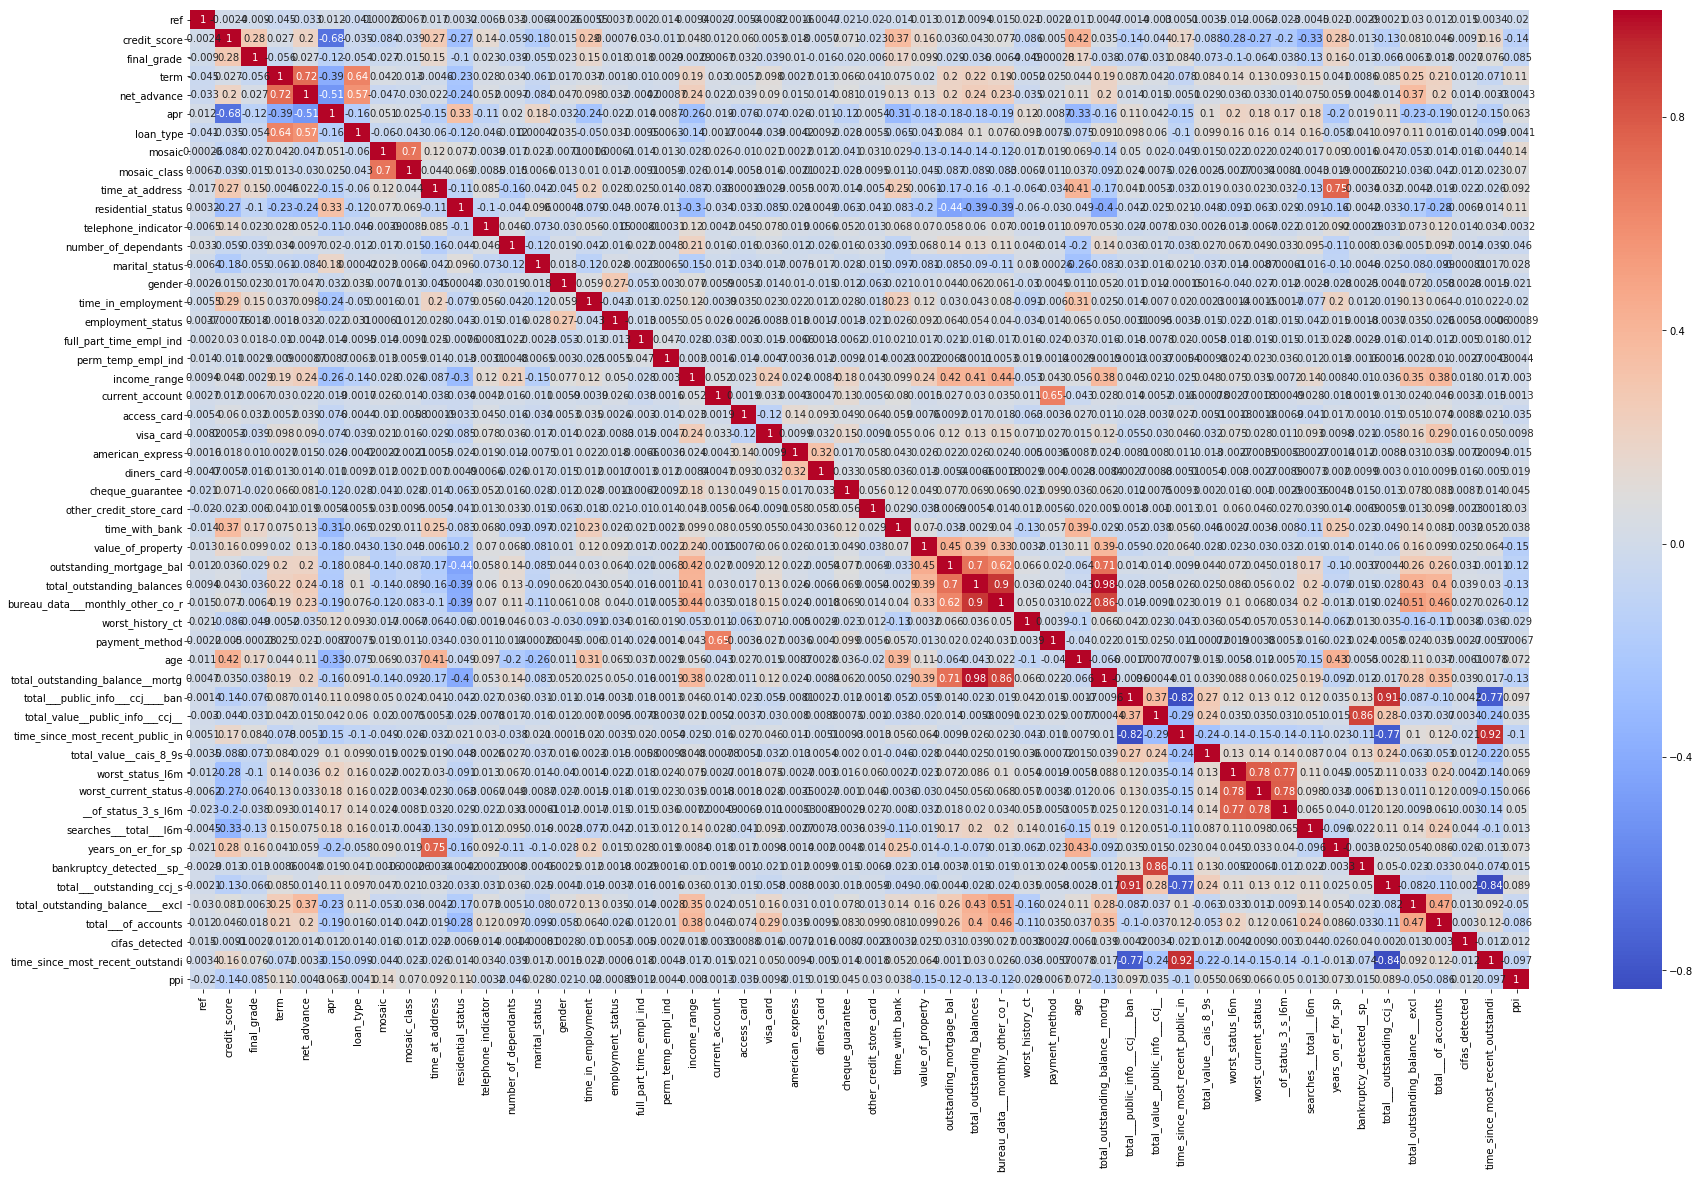

In [16]:
corr=df.corr()
plt.figure(figsize=(30,18))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [17]:
x=df.drop(['ppi'],axis=1) 
y=df['ppi']

C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.03126303 0.03620874 0.02619309 0.03259282 0.03175787 0.03264255
 0.01721235 0.03270083 0.02844735 0.03370643 0.0162209  0.00877702
 0.02582049 0.02144548 0.01848734 0.03044586 0.02404616 0.00115174
 0.00033576 0.04069658 0.00046982 0.01338949 0.01554088 0.00252576
 0.0023074  0.01175711 0.01531383 0.0314005  0.02750313 0.02670697
 0.03269057 0.02854875 0.02298713 0.00093203 0.03373982 0.02449328
 0.00602275 0.00533123 0.00992407 0.0217908  0.02092947 0.01697569
 0.00757221 0.0284067  0.03083241 0.00020031 0.0041455  0.03040413
 0.02968846 0.00108477 0.00623261]


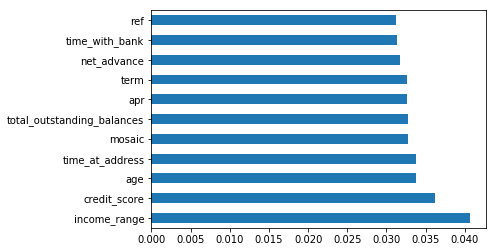

<Figure size 864x576 with 0 Axes>

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.figure(figsize=(12,8))
plt.show()

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

(11468, 51) (4915, 51) (11468,) (4915,)


C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
model = LogisticRegression()
model = model.fit(x_train,y_train)
ypred = model.predict(x_test)

accuracy_lr = accuracy_score(ypred,y_test)
recall_lr = recall_score(ypred,y_test)
print(accuracy_lr)
print(classification_report(ypred,y_test))

cm=confusion_matrix(ypred,y_test)
print(cm)

C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6632756866734486
              precision    recall  f1-score   support

           0       0.48      0.63      0.54      1575
           1       0.79      0.68      0.73      3340

   micro avg       0.66      0.66      0.66      4915
   macro avg       0.64      0.65      0.64      4915
weighted avg       0.69      0.66      0.67      4915

[[ 988  587]
 [1068 2272]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(x_train,y_train)
ypred = model.predict(x_test)

accuracy_rf = accuracy_score(ypred,y_test)
recall_rf = recall_score(ypred,y_test)

print(accuracy_rf)

print(classification_report(ypred,y_test))

cm=confusion_matrix(ypred,y_test)
print(cm)

C:\Users\eprmitr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6382502543234995
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      2172
           1       0.67      0.70      0.68      2743

   micro avg       0.64      0.64      0.64      4915
   macro avg       0.63      0.63      0.63      4915
weighted avg       0.64      0.64      0.64      4915

[[1225  947]
 [ 831 1912]]


In [42]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb=xgb.fit(x_train, y_train)
ypred = xgb.predict(x_test)

accuracy_xgb = accuracy_score(ypred,y_test)
recall_xgb = recall_score(ypred,y_test)

print(accuracy_xgb)
print(classification_report(ypred,y_test))

cm=confusion_matrix(ypred,y_test)
print(cm)

0.6724313326551373
              precision    recall  f1-score   support

           0       0.55      0.62      0.59      1834
           1       0.76      0.70      0.73      3081

   micro avg       0.67      0.67      0.67      4915
   macro avg       0.66      0.66      0.66      4915
weighted avg       0.68      0.67      0.68      4915

[[1140  694]
 [ 916 2165]]


In [43]:
i=['XGBoost Classifier','Random Forest Classifier','Logistic Regression']
d={"Accuracy":[accuracy_xgb,accuracy_rf,accuracy_lr],"Recall":[recall_xgb,recall_rf,recall_lr]}
result=pd.DataFrame(data=d,index=i)
result

,Accuracy,Recall
XGBoost Classifier,0.672431,0.702694
Random Forest Classifier,0.638250,0.697047
Logistic Regression,0.663276,0.680240
